<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Unsupervised%20Multivariate%20Methods/Cluster_Analysis_Assignment_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis
Marketing team of ABC Bank is running a campaign for credit card on the existing customers. Marketing team wants to understand the segments of the customers to target based on the Minimum and Maximum Balances, Monthly Income, age of the customer, association of the customer with bank (in years).

In [ ]:
install.packages("flextable",repos = "http://cran.us.r-project.org")
install.packages("officer",repos = "http://cran.us.r-project.org")
install.packages("factoextra",repos = "http://cran.us.r-project.org")
install.packages("flexclust",repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fontBitstreamVera’, ‘fontLiberation’, ‘fontquiver’, ‘gdtools’, ‘officer’


Warning message in install.packages("flextable", repos = "http://cran.us.r-project.org"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("flextable", repos = "http://cran.us.r-project.org"):
“installation of package ‘flextable’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompVie

In [ ]:
library(dplyr)
library(purrr)
#library(flextable)
library(officer)
library(factoextra)
library(flexclust)
library(ggplot2)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [ ]:
# 1. Import Customer data in R
df =read.csv("/content/Customer data.csv")
head(df)

,Cust_Id,City,age,MonthlyIncome,MinBal,MaxBal,Age.with.Bank
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,10015,Mumbai,27,12880,2742,11425,1
2,10016,Pune,25,11612,2982,12370,1
3,10017,Mumbai,28,15614,3510,14144,1
4,10018,Mumbai,29,19278,4088,10179,1
5,10019,Nashik,27,15281,4134,10051,1
6,10020,Nashik,28,19230,2779,11457,1


In [ ]:
# 2. Subset the data excluding Customer id and City.
customers<-subset(df,select=c(-Cust_Id,-City))
head(customers)

,age,MonthlyIncome,MinBal,MaxBal,Age.with.Bank
,<int>,<int>,<int>,<int>,<int>
1,27,12880,2742,11425,1
2,25,11612,2982,12370,1
3,28,15614,3510,14144,1
4,29,19278,4088,10179,1
5,27,15281,4134,10051,1
6,28,19230,2779,11457,1


In [ ]:
# 3. Scale the variables.
customers_std = scale(customers) %>% as.data.frame()
head(customers_std)

,age,MonthlyIncome,MinBal,MaxBal,Age.with.Bank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.0249006,-1.0884120,-1.096643,-1.1313683,-1.08835
2,-1.1873952,-1.1309465,-1.081076,-1.0799846,-1.08835
3,-0.9436533,-0.9967009,-1.046827,-0.9835247,-1.08835
4,-0.8624060,-0.8737934,-1.009335,-1.1991186,-1.08835
5,-1.0249006,-1.0078713,-1.006351,-1.2060785,-1.08835
6,-0.9436533,-0.8754036,-1.094243,-1.1296283,-1.08835


In [ ]:
# 4. Run kmeans on the scaled variable with 3 clusters.
set.seed(123)
k3<-kmeans(customers_std,3)
k3$size

[1] 27016 26013 27052

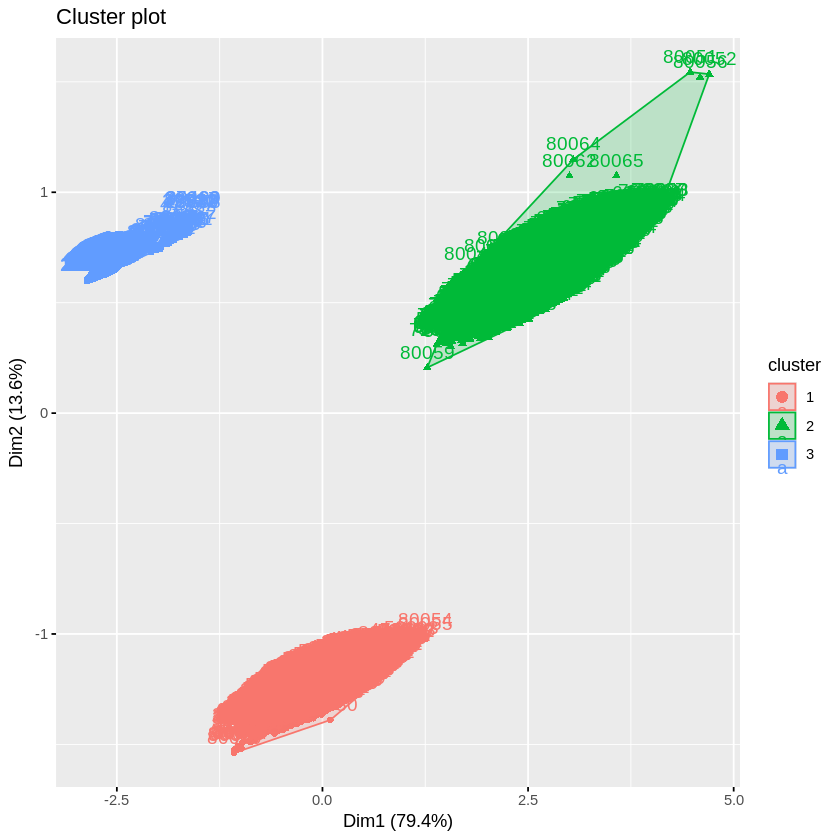

In [ ]:
customers_std$segment_mean<-k3$cluster
customers_std=data.frame(customers_std)
fviz_cluster(k3, data = customers_std)

In [ ]:
# 5. Obtain mean of original variables for each cluster.
allmean=aggregate( cbind(age,MonthlyIncome,MinBal,MaxBal
                  ,Age.with.Bank)~segment_mean,data=customers_std
                   ,FUN=mean)
allmean=allmean %>% map(round,2) %>% as.data.frame()
allmean

segment_mean,age,MonthlyIncome,MinBal,MaxBal,Age.with.Bank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.18,-0.10,-0.24,-0.12,-0.05
2,1.25,1.24,1.32,1.24,1.19
3,-1.02,-1.10,-1.03,-1.07,-1.09


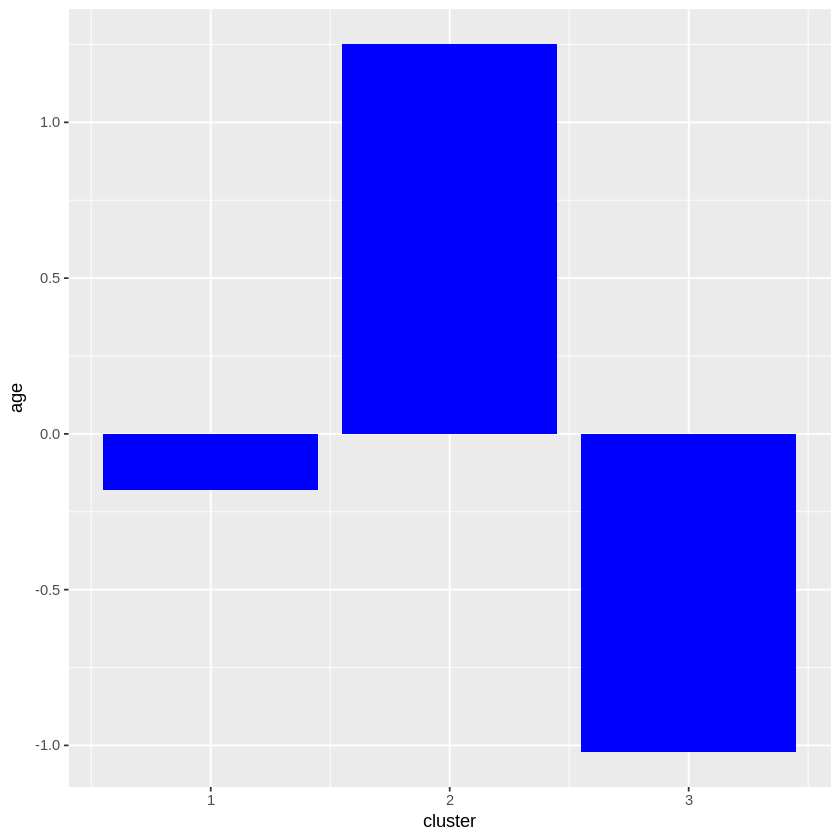

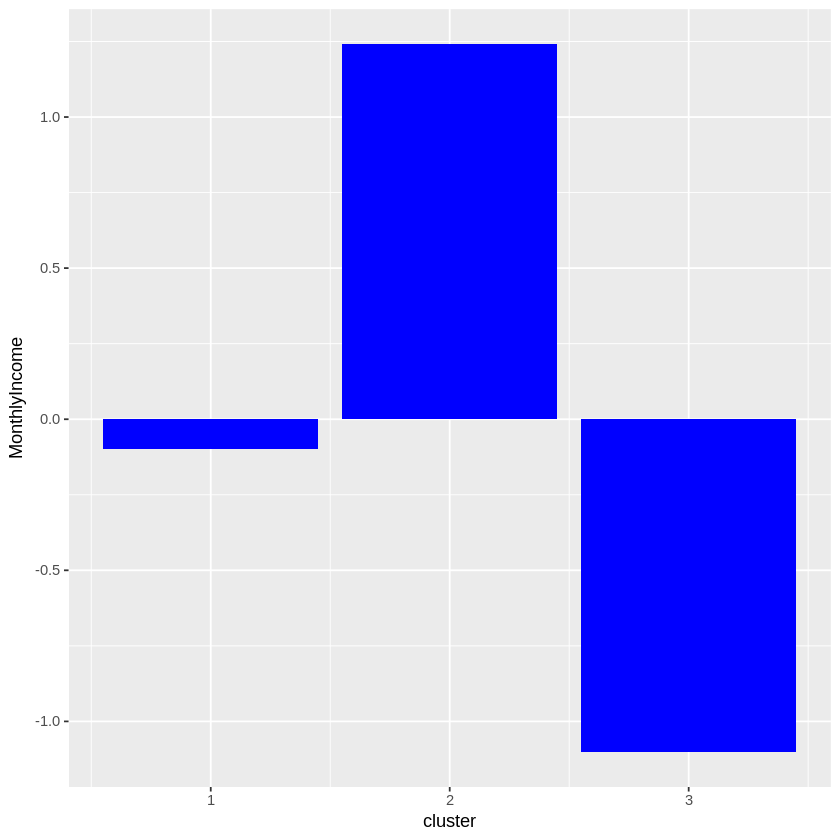

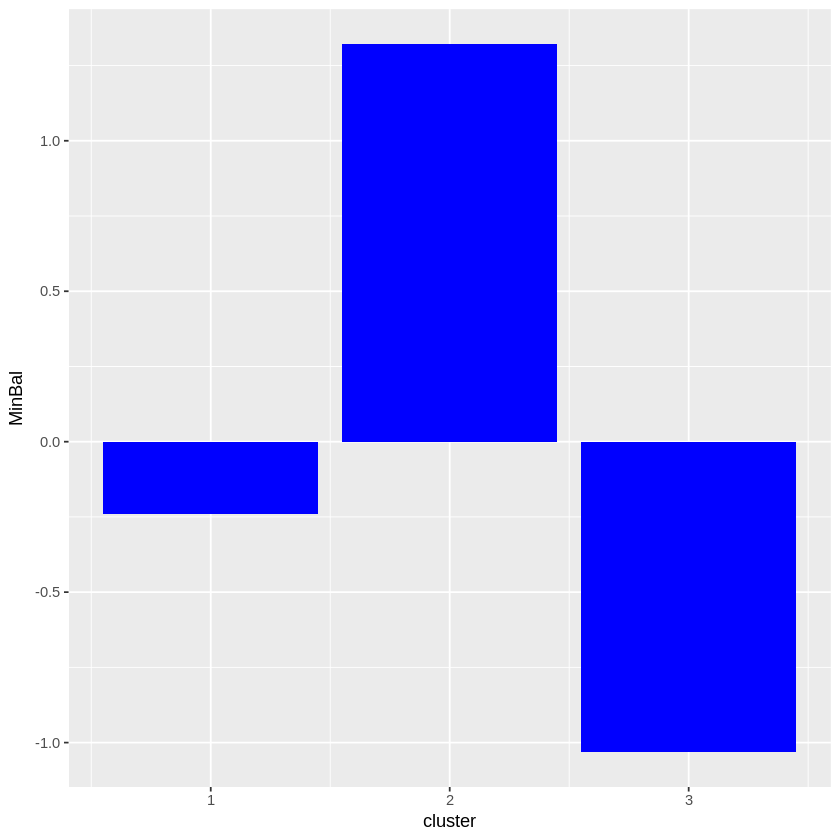

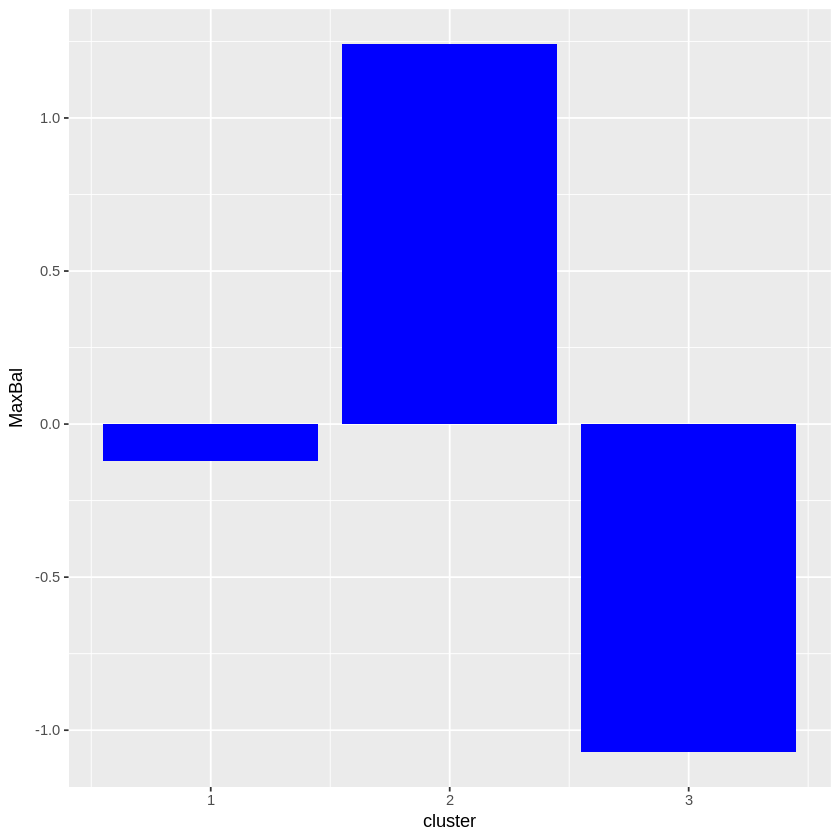

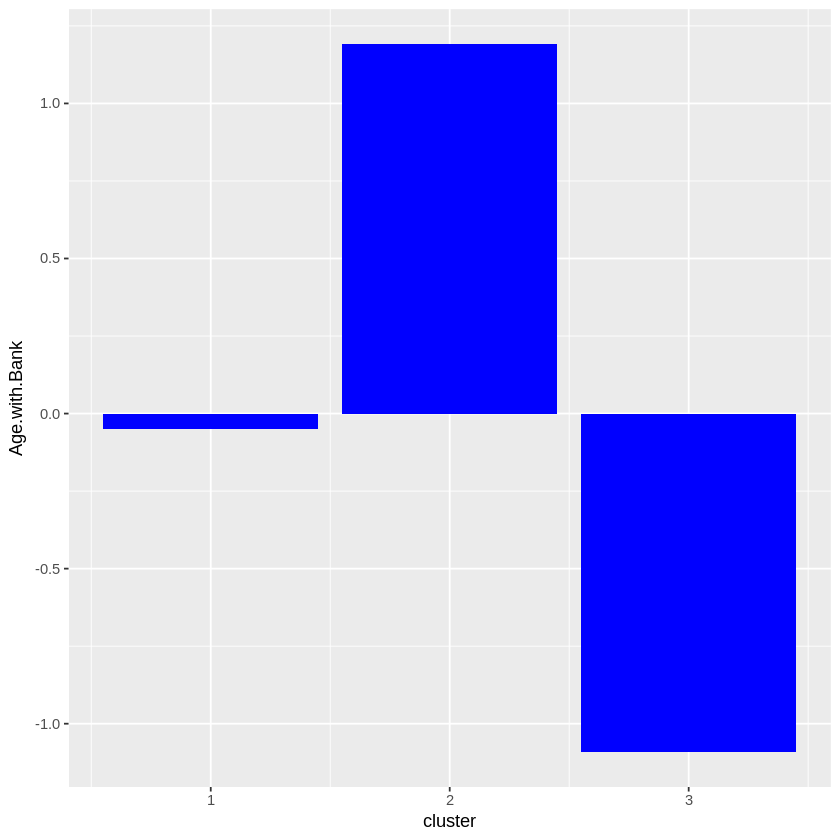

In [ ]:
# 6. Interpret the clusters.
par( mar= c(1,15,15,1) )
for (i in 1:5) {
  print((ggplot(allmean,aes(x=segment_mean,y=allmean[,i+1])))
        +geom_bar(stat = "identity",fill="blue")
        +labs(x="cluster",y=names(allmean)[i+1])
        )
}

Cluster 2 seems to represent a segment of older, high-income, high-balance, high fedelity individuals. This makes it a prime target for high-end credit cards.

Cluster 1, seems for younger and with lower income and balances, less years with the bank.

Cluster 3, potentially consisting of mid-aged, lower-income customers with lower balances and low fedelity.


Cluster 2 should be prioritized for premium product offerings with higher limits and exclusive perks.

Cluster 1 could benefit from products targeting younger demographics, possibly with social benefits like cashback on dining or entertainment.

Cluster 3 could be targeted with versatile cards that combine rewards with moderate interest rates, appealing to individuals who may prioritize a balance of affordability and perks.


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4004050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4004050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4004050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4004050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4004050)”


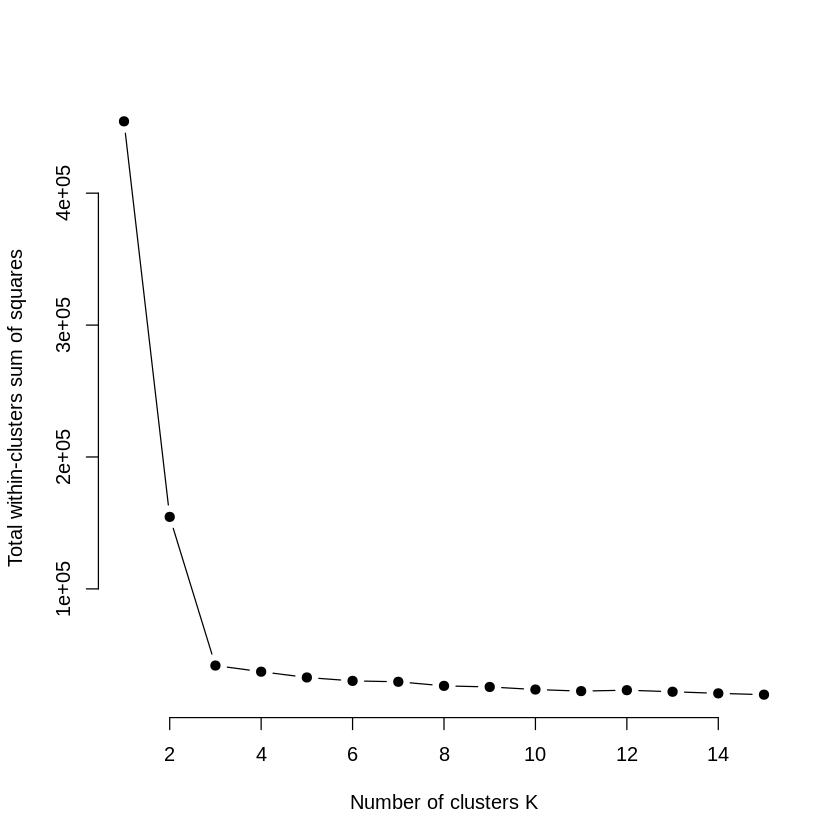

In [ ]:
# 7. Obtain plot of WSS (Within Sum of Squares) to check number of clusters.

wss <- function(k) {
  kmeans(customers_std, k, nstart = 10 ,iter.max = 1000)$tot.withinss
}

 k.values <- 1:15

  wss_values <- map_dbl(k.values, wss)

 plot(k.values, wss_values,
      type="b", pch = 19, frame = FALSE,
      xlab="Number of clusters K",
      ylab="Total within-clusters sum of squares")